In [24]:
import os

import matplotlib.pyplot as plt

data_path = os.path.join(os.getcwd(), 'data/agriculture-crops')


Remove .DS_Store files from folders

In [25]:
for folder in os.listdir(data_path):
    if '.DS_Store' in os.listdir(os.path.join(data_path, folder)):
        os.remove(os.path.join(data_path, folder, '.DS_Store'))

Print number of files in each folder

In [26]:
for folder in os.listdir(data_path):
    print(folder, len(os.listdir(os.path.join(data_path, folder))))

gram 21
sugarcane 23
lemon 25
rice 26
cotton 29
cucumber 28
chilli 21
cherry 29
tobacco_plant 30
cardamom 20
tea 21
jowar 27
wheat 28
coconut 23
almond 19
mustard_oil 25
clove 27
jute 21
pearl_millet-bajra 35
vigna_radiati-mung 24
banana 28
soyabean 25
papaya 21
fox_nut-makhana 21
pineapple 23
coffee_plant 26
tomato 24
olive_tree 27
sunflower 22
maize 28


Create label and image path list

In [27]:
image_paths = []
labels = []

for category in os.listdir(data_path):
    category_dir = os.path.join(data_path, category)
    for image_file in os.listdir(category_dir):
        if image_file.endswith(".jpg"):
            image_path = os.path.join(category_dir, image_file)
            image_paths.append(image_path)
            labels.append(category)

print(labels)


['gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'gram', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'sugarcane', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'cotton', 'cotton', 'cotton', 'cotton', 'cotton', 'cotton', 'cotton', 'cotton', 'cotton', 'cotton',

Display the first image each in each folder

Category: clove


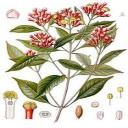

Category: coconut


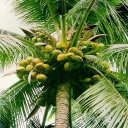

Category: pineapple


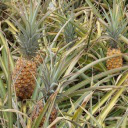

Category: papaya


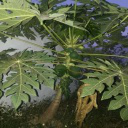

Category: wheat


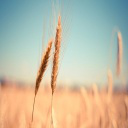

Category: cardamom


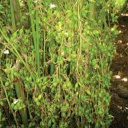

Category: coffee_plant


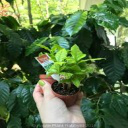

Category: almond


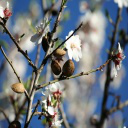

Category: lemon


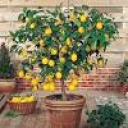

Category: cherry


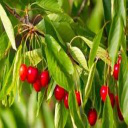

Category: mustard_oil


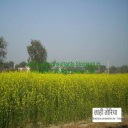

Category: pearl_millet-bajra


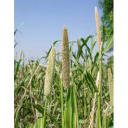

Category: cotton


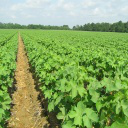

Category: cucumber


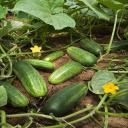

Category: sugarcane


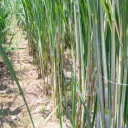

Category: jowar


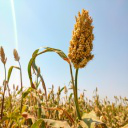

Category: olive_tree


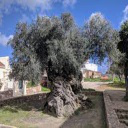

Category: sunflower


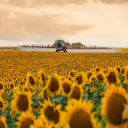

Category: maize


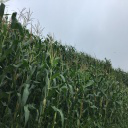

Category: banana


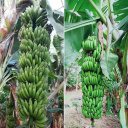

Category: gram


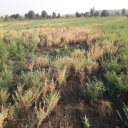

Category: fox_nut-makhana


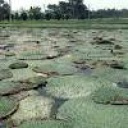

Category: soyabean


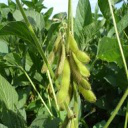

Category: jute


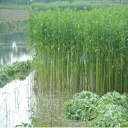

Category: tomato


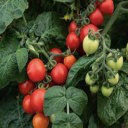

Category: tobacco_plant


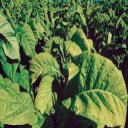

Category: tea


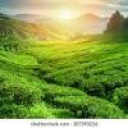

Category: vigna_radiati-mung


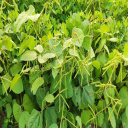

Category: rice


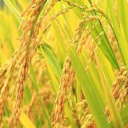

Category: chilli


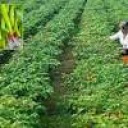

In [28]:
from PIL import Image

for category in set(labels):
    print('Category:', category)
    # print first image in each category
    image = Image.open(os.path.join(data_path, category, os.listdir(os.path.join(data_path, category))[0]))
    display(image)


Load images into a list and convert to grayscale

In [29]:
from PIL import Image
import numpy as np

images = []

for folder in os.listdir(data_path):
    for file in os.listdir(os.path.join(data_path, folder)):
        image = Image.open(os.path.join(data_path, folder, file))

        new_width = image.width // 10
        new_height = image.height // 10

        # Resize the image
        resized_image = image.resize((new_width, new_height), Image.ANTIALIAS)

        image = resized_image.convert('L')

        image = np.array(image).flatten()

        images.append(image)

print(len(images[0]))
print(images[0])

/var/folders/m7/dkyjm7gn71ggjt2b8p3ymthc0000gn/T/ipykernel_30110/2680111091.py:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_image = image.resize((new_width, new_height), Image.ANTIALIAS)


144
[252 253 248 248 252 255 255 255 242 239 244 238 188 177 162 155 171 192
 195 170 152 146 163 160 172 171 174 176 181 176 177 180 178 161 152 154
 159 167 162 163 165 172 167 146 148 150 155 148 125 119 119 114 106 110
 111 105 122 152 132 119 117 103 119 141 132 133 158 163 156 107  95 107
 128  99 111 129 112 148 116 115  98  62  94  79 107  89 102 133 125 122
  76  67  80  68  74  95  96  87 122 123 128 101  53  52  86  75  31  50
  92  97 132  89 130 110  49  56  45  66  47  31 138  90  64 115 119  80
  71  65  52  61  52  48 109  64  76 104  85  83  75  56  70  36  34  35]


In [30]:
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

X = images
y = labels

models = [
    BaggingClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=1.0,
        max_depth=1,
        random_state=0
    )
]

kf = KFold(n_splits=5, shuffle=True, random_state=1234)

In [31]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

classification_results = pd.DataFrame(columns=['model', 'accuracy', "f1", "precision", "recall"])

for model in models:
    model_name = model.__class__.__name__
    scores = {"mean_accuracy": 0, "accuracy": [], "mean_f1": 0, "f1": [], "mean_precision":0, "precision": [],
              "mean_recall": 0, "recall": []}

    for train_index, text_index in kf.split(X, y):
        X_train, X_test = np.array(X)[train_index], np.array(X)[text_index]
        y_train, y_test = np.array(y)[train_index], np.array(y)[text_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        scores["accuracy"].append(accuracy_score(y_test, y_pred))
        scores["f1"].append(f1_score(y_test, y_pred, average='weighted'))
        scores["precision"].append(precision_score(y_test, y_pred, average='weighted'))
        scores["recall"].append(recall_score(y_test, y_pred, average='weighted'))

    classification_results = classification_results.append({
        "model": model_name,
        "mean_accuracy": np.mean(scores["accuracy"]),
        "mean_f1": np.mean(scores["f1"]),
        "mean_precision": np.mean(scores["precision"]),
        "mean_recall": np.mean(scores["recall"]),
        "accuracy": scores["accuracy"],
        "f1": scores["f1"],
        "precision": scores["precision"],
        "recall": scores["recall"]
    }, ignore_index=True)

classification_results.head()

/opt/homebrew/Caskroom/miniforge/base/envs/env_ml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/env_ml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/env_ml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

,model,accuracy,f1,precision,recall,mean_accuracy,mean_f1,mean_precision,mean_recall
0,BaggingClassifier,"[0.1, 0.15333333333333332, 0.15436241610738255...","[0.09374625374625374, 0.14456543456543458, 0.1...","[0.11259259259259259, 0.15223809523809523, 0.1...","[0.1, 0.15333333333333332, 0.15436241610738255...",0.152680,0.141014,0.156012,0.152680
1,RandomForestClassifier,"[0.15333333333333332, 0.19333333333333333, 0.2...","[0.15828860028860028, 0.1788209198209198, 0.18...","[0.23606926406926404, 0.20138095238095238, 0.2...","[0.15333333333333332, 0.19333333333333333, 0.2...",0.188796,0.179511,0.230519,0.188796
2,AdaBoostClassifier,"[0.07333333333333333, 0.08, 0.0604026845637583...","[0.04493369593369593, 0.044694774779520545, 0....","[0.043981481481481476, 0.0524727463312369, 0.0...","[0.07333333333333333, 0.08, 0.0604026845637583...",0.062881,0.034879,0.035148,0.062881
3,GradientBoostingClassifier,"[0.02666666666666667, 0.08, 0.0268456375838926...","[0.001513002364066194, 0.07080519480519482, 0....","[0.0007785888077858881, 0.07348148148148148, 0...","[0.02666666666666667, 0.08, 0.0268456375838926...",0.066971,0.050562,0.056480,0.066971


In [32]:
import seaborn as sns

accuracy_results = {}
f1_results = {}
precision_results = {}
recall_results = {}

names = []

for model in models:
    model_name = model.__class__.__name__
    
    accuracy_results[model_name] = classification_results[classification_results['model'] == model_name]['accuracy'].values[0]
    f1_results[model_name] = classification_results[classification_results['model'] == model_name]['f1'].values[0]
    precision_results[model_name] = classification_results[classification_results['model'] == model_name]['precision'].values[0]
    recall_results[model_name] = classification_results[classification_results['model'] == model_name]['recall'].values[0]


accuracy_results = pd.DataFrame(accuracy_results)
f1_results = pd.DataFrame(f1_results)
precision_results = pd.DataFrame(precision_results)
recall_results = pd.DataFrame(recall_results)

accuracy_results = accuracy_results.melt(var_name='model', value_name='accuracy')
f1_results = f1_results.melt(var_name='model', value_name='f1')
precision_results = precision_results.melt(var_name='model', value_name='precision')
recall_results = recall_results.melt(var_name='model', value_name='recall')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier')])

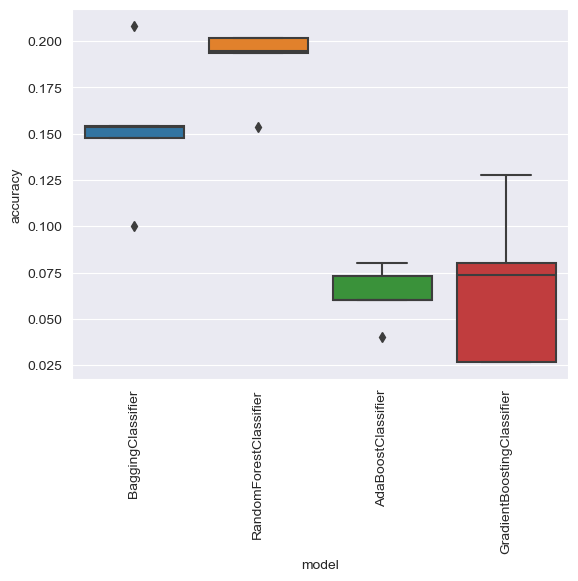

In [33]:
sns.boxplot(x='model', y='accuracy', data=accuracy_results)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier')])

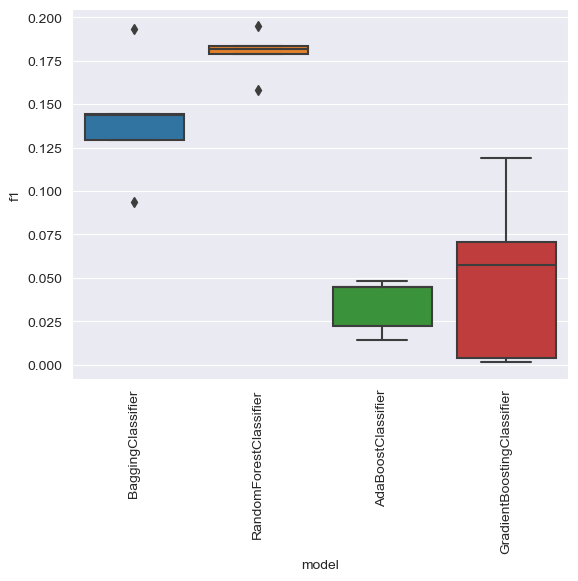

In [34]:
sns.boxplot(x='model', y='f1', data=f1_results)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier')])

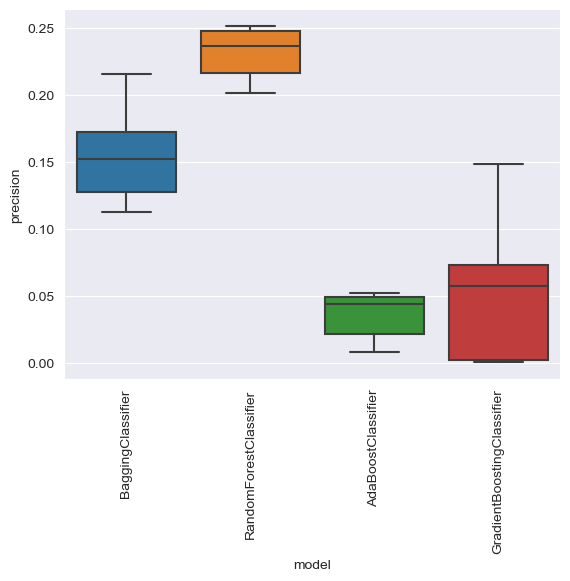

In [35]:
sns.boxplot(x='model', y='precision', data=precision_results)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier')])

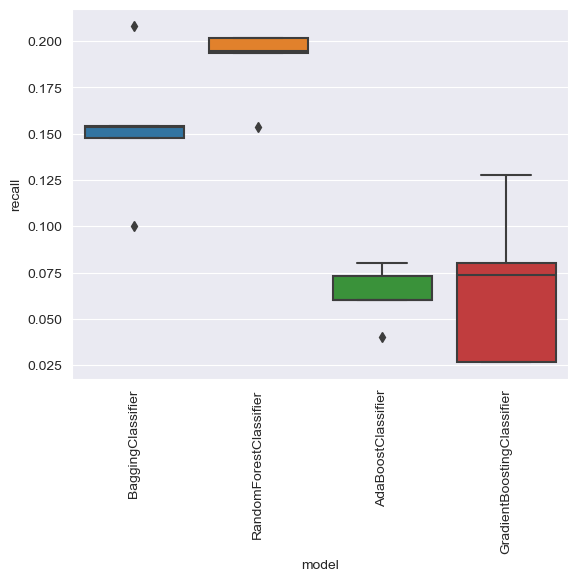

In [36]:
sns.boxplot(x='model', y='recall', data=recall_results)
plt.xticks(rotation=90)

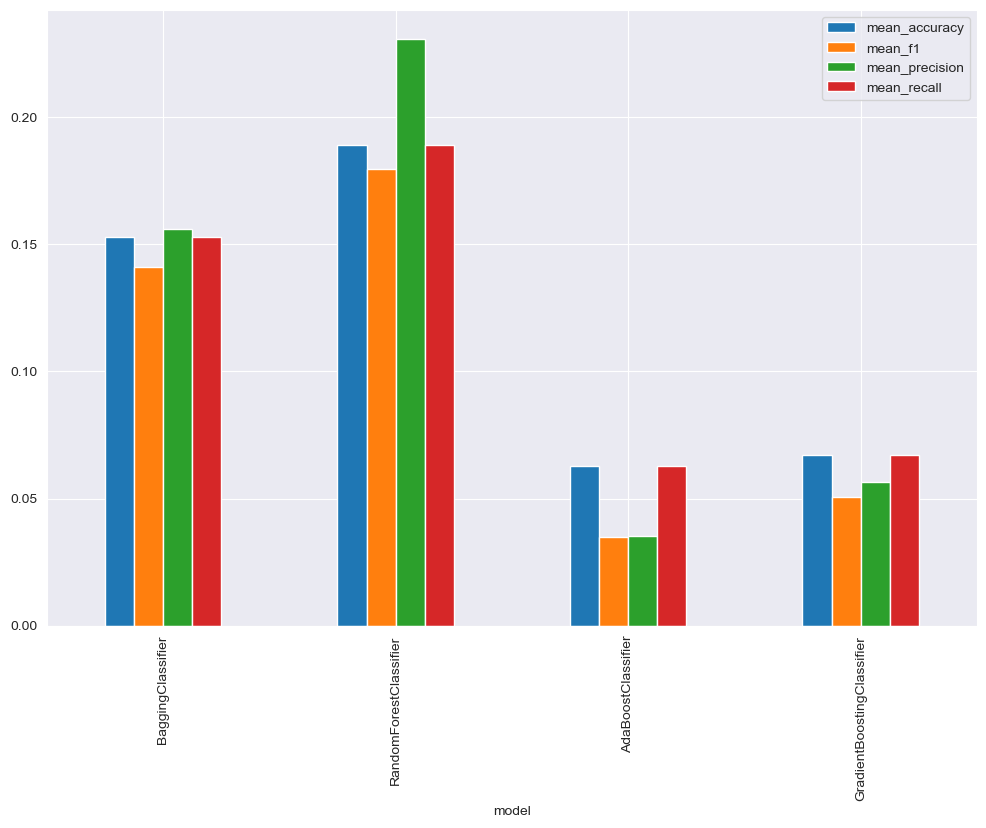

In [37]:
classification_results.plot.bar(x='model', y=['mean_accuracy', 'mean_f1', 'mean_precision', 'mean_recall'], figsize=(12, 8))
plt.show()